# Basic Classification demo (cont'd)
Last lecture we learned of the *fit* and *predict* paradigm.  Also, we now have a classifier.  We now proceed to the evaluation phase of the quality of our classifier.

We pick up from where we left off, but halfway through we cange course a bit.

In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data 
y = iris.target
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.) #define the SVM classifier.
clf.fit(X,y) #let's train this sucker!
y_hat=clf.predict(X)
accuracy_score(y, y_hat)

0.98

So we see what we did last time was only a few lines of code.  This is very powerful and we still achieve 98% accuracy (now verified).  We went further to try to do some initial evaluation of our classifier by taking a look at some of the misclassifications.

In [3]:
no_matches=[]
for i in range(len(y_hat)):
    flag='no_match'
    if (y_hat[i]==y[i]):
        flag='match'
    else:
        no_matches.append(i)
    print i,y[i],y_hat[i],flag

0 0 0 match
1 0 0 match
2 0 0 match
3 0 0 match
4 0 0 match
5 0 0 match
6 0 0 match
7 0 0 match
8 0 0 match
9 0 0 match
10 0 0 match
11 0 0 match
12 0 0 match
13 0 0 match
14 0 0 match
15 0 0 match
16 0 0 match
17 0 0 match
18 0 0 match
19 0 0 match
20 0 0 match
21 0 0 match
22 0 0 match
23 0 0 match
24 0 0 match
25 0 0 match
26 0 0 match
27 0 0 match
28 0 0 match
29 0 0 match
30 0 0 match
31 0 0 match
32 0 0 match
33 0 0 match
34 0 0 match
35 0 0 match
36 0 0 match
37 0 0 match
38 0 0 match
39 0 0 match
40 0 0 match
41 0 0 match
42 0 0 match
43 0 0 match
44 0 0 match
45 0 0 match
46 0 0 match
47 0 0 match
48 0 0 match
49 0 0 match
50 1 1 match
51 1 1 match
52 1 1 match
53 1 1 match
54 1 1 match
55 1 1 match
56 1 1 match
57 1 1 match
58 1 1 match
59 1 1 match
60 1 1 match
61 1 1 match
62 1 1 match
63 1 1 match
64 1 1 match
65 1 1 match
66 1 1 match
67 1 1 match
68 1 1 match
69 1 1 match
70 1 2 no_match
71 1 1 match
72 1 1 match
73 1 1 match
74 1 1 match
75 1 1 match
76 1 1 match
77 1 2

The code above almost assuredly can (and should) be vectorized.  This is important enough to have a small aside.  Instead of looping through each value in y and y_hat, we should probably just compare the two vectors directly.  

In [4]:
import numpy as np
correct_matches=(y==y_hat)
false_matches=(y!=y_hat)

Here we define two simple vectors that tell us quickly whether the corresponding entries in y and y_hat match.  As with any **logical operator** the entries will be Boolean.  Let's check this out. 

In [5]:
print correct_matches

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [6]:
print false_matches

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False  True False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


We know that in most programming languages False is 0 and True is non-zero.  For instance

In [7]:
if 17:
    print "I told you this was true"

I told you this was true


This convenient provides a quick way of determining which is in each category and is achieved by summing the contents of the vector.

In [8]:
print np.sum(correct_matches)
print np.sum(false_matches)

147
3


And of course we can verify the accuracy as simply $$\frac{a}{a+b}$$

In [9]:
print np.sum(correct_matches)/(np.sum(correct_matches)+np.sum(false_matches))

0


So I laid an egg on this one.  Please fix it.

In [10]:
for i in no_matches:
    print iris.target_names[y_hat[i]],iris.target_names[y[i]],X[i]

virginica versicolor [5.9 3.2 4.8 1.8]
virginica versicolor [6.7 3.  5.  1.7]
virginica versicolor [6.  2.7 5.1 1.6]


What if we want to save our classifier and transport it to another student to cheat in this course?  **Note:  Don't do it**.  The process of converting objects to something that can be written to a file is serialization.  In Python a module that serializes all sorts of objects is pickle.

In [11]:
import pickle
pickled_object=pickle.dumps(clf)

In [17]:
type(pickled_object)

str

In [12]:
print(pickled_object)

ccopy_reg
_reconstructor
p0
(csklearn.svm.classes
SVC
p1
c__builtin__
object
p2
Ntp3
Rp4
(dp5
S'_impl'
p6
S'c_svc'
p7
sS'kernel'
p8
S'rbf'
p9
sS'verbose'
p10
I00
sS'probability'
p11
I00
sS'classes_'
p12
cnumpy.core.multiarray
_reconstruct
p13
(cnumpy
ndarray
p14
(I0
tp15
S'b'
p16
tp17
Rp18
(I1
(I3
tp19
cnumpy
dtype
p20
(S'i8'
p21
I0
I1
tp22
Rp23
(I3
S'<'
p24
NNNI-1
I-1
I0
tp25
bI00
S'\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x00\x00\x00\x00'
p26
tp27
bsS'support_'
p28
g13
(g14
(I0
tp29
g16
tp30
Rp31
(I1
(I48
tp32
g20
(S'i4'
p33
I0
I1
tp34
Rp35
(I3
S'<'
p36
NNNI-1
I-1
I0
tp37
bI00
S'\x17\x00\x00\x00\x18\x00\x00\x00)\x00\x00\x00,\x00\x00\x002\x00\x00\x003\x00\x00\x004\x00\x00\x006\x00\x00\x007\x00\x00\x008\x00\x00\x009\x00\x00\x00?\x00\x00\x00B\x00\x00\x00D\x00\x00\x00F\x00\x00\x00H\x00\x00\x00I\x00\x00\x00L\x00\x00\x00M\x00\x00\x00N\x00\x00\x00S\x00\x00\x00T\x00\x00\x00U\x00\x00\x00V\x00\x00\x00W\x00\x00\x00[\x00\x00\x00]\x00\x00\x00b\x00\x00\x00e\

So pickled_object is just a string that can be written to a file.  We can prove that this object can be copied to another and retain the same functionality.

In [13]:
clf2=pickle.loads(pickled_object)
print type(clf2)

<class 'sklearn.svm.classes.SVC'>


In [14]:
y_hat2=clf2.predict(X)
accuracy_score(y, y_hat2)

0.98

We got the same result!  This might not be that handy in this class, but the concept of serialization is a fundamental and valuable one.  Let's go on to other forms of evaluation.  We first cover a fundamental one, the confusion matrix.  This is easy to code, but is important to understand.

In [15]:
from sklearn.metrics import confusion_matrix
#confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
print confusion_matrix(y, y_hat)

[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


So the confusion matrix is square with a row and column for each class.  Each row represents the predicted class while each column represents the actual class.  With that in mind let's talk about what the previous confusion matrix means.

We see that we have classified all 150 patterns using the entire training set, but we have no idea how this will perform in the wild.  Proper meethodology is to split the dataset up into training and test (sometimes called validation).  Let's see how we perform with different split sizes.  Guesses?  There are some interesting ways to split a dataset up, but scikit-learn has a nice little function called train_test_split that does a lot of the hard work for you in a single line of code.

In [27]:
from sklearn.model_selection import train_test_split
p=0.9
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=p,shuffle=False)

In [28]:
print X_train.shape,X_test.shape,y_train.shape,y_test.shape

(135, 4) (15, 4) (135,) (15,)


In [29]:
clf.fit(X_train,y_train)
y1=clf.predict(X_train)
print accuracy_score(y_train,y1)
y_test_hat=clf.predict(X_test)
print accuracy_score(y_test,y_test_hat)

0.9629629629629629
0.9333333333333333


We will play around with different train_test splits just to see what happens.  For project based work it's probably best to dispense with the Jupyter notebook and use a real Python script.  This will be subject of Tuesday's lecture.  We now move on to the dataset of our first project to try to help you get some familiarity with this very famous data. 

In [31]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.')


In [32]:
print mnist.keys()
print mnist.data.shape
print mnist.target.shape

['data', 'COL_NAMES', 'DESCR', 'target']
(70000, 784)
(70000,)


In [41]:
print mnist['COL_NAMES']
print mnist['DESCR']
print len(mnist['target'])

['label', 'data']
mldata.org dataset: mnist-original
70000


In [51]:
zero1=mnist.data[57789]
zero1.shape
zero1=np.reshape(zero1,(28,28))

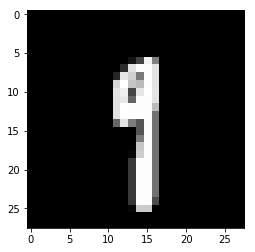

9.0


In [53]:
import matplotlib.pyplot as plt
plt.imshow(zero1,cmap='gray')
plt.show()
print mnist['target'][57789]

It might be a good idea to create a small Python script to print out a few images outside of the notebook environment.

In [54]:
type(zero1)

numpy.ndarray

In [60]:
zero1[15][15]

253

In [61]:
np.max(zero1)

255

In [62]:
np.min(zero1)

0

In [63]:
zero2=255-zero1

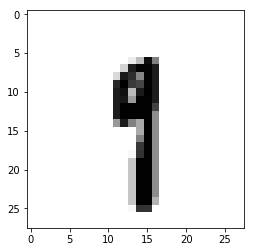

In [64]:
plt.imshow(zero2,cmap='gray')
plt.show()